# <font color='#121254'>COMM415DA Fundamentals of Data Science</font>

## <font color='#121254'>Ref/Def Assessment</font>

## <font color='#121254'>Question-1</font>

#### <font color='#003300'>Import libraries</font>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

### 

### <font color='#003300'>a)</font>

#### <font color='#003300'>Analyze the Exasens Data Set</font>

From: https://archive.ics.uci.edu/ml/datasets/Exasens

This repository introduces a novel dataset for the classification of 4 groups of respiratory diseases: 
1. Chronic Obstructive Pulmonary Disease (COPD) 
2. Asthma 
3. Infected 
4. Healthy Controls (HC).

The Exasens dataset includes demographic information on 4 groups of saliva samples (COPD-Asthma-Infected-HC) collected in the frame of a joint research project, at the Research Center Borstel, BioMaterialBank Nord (Borstel, Germany). The sampling procedure of the patient materials was approved by the local ethics committee of the University of Luebeck under the approval number AZ-16-167 and a written informed consent was obtained from all subjects. A permittivity biosensor, developed at IHP Microelectronics (Frankfurt Oder, Germany), was used for the dielectric characterization of the saliva samples for classification purposes

Definition of 4 sample groups included within the Exasens dataset:
1. Outpatients and hospitalized patients with COPD without acute respiratory infection (COPD).
2. Outpatients and hospitalized patients with asthma without acute respiratory infections (Asthma).
3. Patients with respiratory infections, but without COPD or asthma (Infected).
4. Healthy controls without COPD, asthma, or any respiratory infection (HC).



#### Attribute Information:
1. Diagnosis (COPD-HC-Asthma-Infected)
2. ID
3. Age
4. Gender (1=male, 0=female)
5. Smoking Status (1=Non-smoker, 2=Ex-smoker, 3=Active-smoker)
6. Saliva Permittivity:

a) Imaginary part (Min(Î”)=Absolute minimum value, Avg.(Î”)=Average)
b) Real part (Min(Î”)=Absolute minimum value, Avg.(Î”)=Average)

#### Data Description:
Database is composed of 399 observations and 9 variables, among these variables we have continous variables and categorical variables

#### Observation:
Note that the infected observations have 0 people who smoke, the median age of people who smoke and who are affected by Asthma or are HC is less than 50 years, on the other hand the median age of people who are affected by COPD is more than 50 years old.

It is noted that the infected or HC observations are yunger than the individuals affected by COPD or by Asthma.

### 

### <font color='#003300'>b)</font>

In [2]:
# Load the dataset in a pandas dataframe
def load_exasens_data_set():
    path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00523/Exasens.csv'
    df = pd.read_csv(path
                ,skiprows=3
                ,index_col=False
                ,names=  ["Diagnosis", "ID", "Imaginary_Part_Min", "Imaginary_Part_Avg","Real_Part_Min","Real_Part_Avg","Gender","Age","Smoking","A","B","C",'D']
                ,usecols=["Diagnosis", "ID", "Imaginary_Part_Min", "Imaginary_Part_Avg","Real_Part_Min","Real_Part_Avg","Gender","Age","Smoking"]
                )
    return df

exasens_df = load_exasens_data_set()
exasens_df.head(10)

,Diagnosis,ID,Imaginary_Part_Min,Imaginary_Part_Avg,Real_Part_Min,Real_Part_Avg,Gender,Age,Smoking
0,COPD,301-4,-320.61,-300.563531,-495.26,-464.171991,1,77,2
1,COPD,302-3,-325.39,-314.750360,-473.73,-469.263140,0,72,2
2,COPD,303-3,-323.00,-317.436056,-476.12,-471.897667,1,73,3
3,COPD,304-4,-327.78,-317.399670,-473.73,-468.856388,1,76,2
4,COPD,305-4,-325.39,-316.155785,-478.52,-472.869783,0,65,2
5,COPD,306-3,-327.78,-318.677553,-507.23,-469.024194,1,60,2
6,COPD,307-3,-330.18,-320.617478,-473.73,-467.361854,1,76,2
7,COPD,308,NaN,NaN,NaN,NaN,1,77,2
8,COPD,309-4,-320.61,-307.599586,-476.12,-470.181633,1,74,2
9,COPD,310-4,-315.82,-300.104765,-473.73,-466.378634,1,67,2


### 

### <font color='#003300'>c)</font>

In [3]:
# Ignore the columns Diagnosis and ID
exasens_df.drop(['Diagnosis','ID'], axis=1, inplace=True)
exasens_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Imaginary_Part_Min  100 non-null    float64
 1   Imaginary_Part_Avg  100 non-null    float64
 2   Real_Part_Min       100 non-null    float64
 3   Real_Part_Avg       100 non-null    float64
 4   Gender              399 non-null    int64  
 5   Age                 399 non-null    int64  
 6   Smoking             399 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 21.9 KB


### 

### <font color='#003300'>d)</font>

In [4]:
# Replace missing values of each column with the average between the median and the mean column value
def replace_missing_with_average_mean_median(df, cols):
    for col in cols:
        df.loc[df[col].isnull(), col] = df[col].fillna((df[col].mean()+df[col].median())/2)
    return df

def get_had_missing(df,col):
    df['had_missing'] = df[col].isna()
    return df


In [5]:
exasens_df_had_missing_df = get_had_missing(exasens_df, 'Imaginary_Part_Min')
exasens_df_non_nulls_df = replace_missing_with_average_mean_median(exasens_df_had_missing_df, cols=['Imaginary_Part_Min','Imaginary_Part_Avg','Real_Part_Min', 'Real_Part_Avg', 'Gender','Age', 'Smoking'])
exasens_df_non_nulls_df.head(10)

,Imaginary_Part_Min,Imaginary_Part_Avg,Real_Part_Min,Real_Part_Avg,Gender,Age,Smoking,had_missing
0,-320.6100,-300.563531,-495.2600,-464.171991,1,77,2,False
1,-325.3900,-314.750360,-473.7300,-469.263140,0,72,2,False
2,-323.0000,-317.436056,-476.1200,-471.897667,1,73,3,False
3,-327.7800,-317.399670,-473.7300,-468.856388,1,76,2,False
4,-325.3900,-316.155785,-478.5200,-472.869783,0,65,2,False
5,-327.7800,-318.677553,-507.2300,-469.024194,1,60,2,False
6,-330.1800,-320.617478,-473.7300,-467.361854,1,76,2,False
7,-318.9709,-309.553427,-473.3661,-462.918834,1,77,2,True
8,-320.6100,-307.599586,-476.1200,-470.181633,1,74,2,False
9,-315.8200,-300.104765,-473.7300,-466.378634,1,67,2,False


### 

### <font color='#003300'>e)</font>

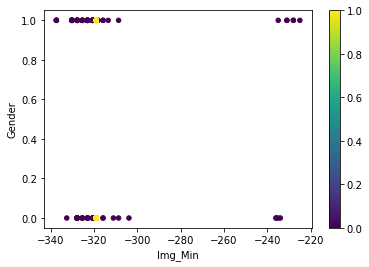

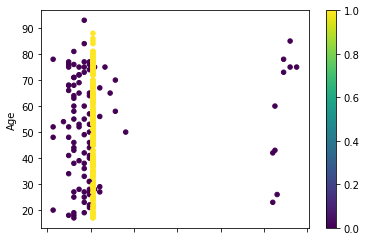

In [6]:
# Display a scatter plot for each distinct pair of columns
fig, ax = plt.subplots()
exasens_df_non_nulls_df.plot(kind='scatter',
                                  x='Imaginary_Part_Min', 
                                  y='Gender', 
                                  c=exasens_df_non_nulls_df['had_missing'],
                                  #color='purple', 
                                  colormap='viridis',
                                  ax=ax)

plt.xlabel('Img_Min')
plt.ylabel('Gender')




exasens_df_non_nulls_df.plot(kind='scatter',
                                  x='Imaginary_Part_Min', 
                                  y='Age', 
                                  c=exasens_df_non_nulls_df['had_missing'],
                                  #color='purple', 
                                  colormap='viridis')

plt.xlabel('Img_Min')
plt.ylabel('Age')
plt.show()

<font color='red'>Note:</font> Here the label of colormap/c (had_missing) is not being printed and ylabel is getting missed due to the bug of the pandas version - 1.4.2 I'm using.



### <font color='#003300'> Extras from 'e' with different combinations with 'Imaginary_Part_Min'</font>

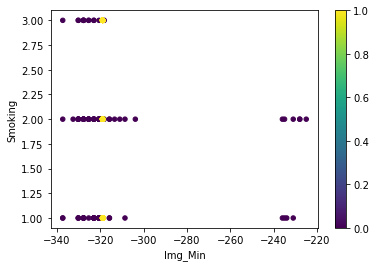

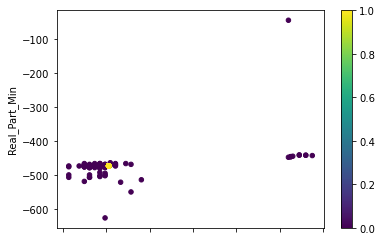

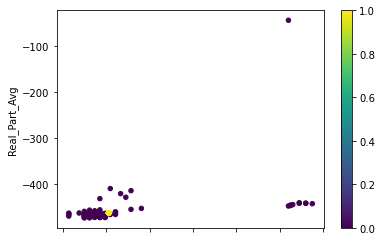

In [7]:
fig, ax = plt.subplots()
exasens_df_non_nulls_df.plot(kind='scatter',
                                  x='Imaginary_Part_Min', 
                                  y='Smoking', 
                                  c=exasens_df_non_nulls_df['had_missing'],
                                  #color='purple', 
                                  colormap='viridis',
                                  ax=ax)

plt.xlabel('Img_Min')
plt.ylabel('Smoking')




exasens_df_non_nulls_df.plot(kind='scatter',
                                  x='Imaginary_Part_Min', 
                                  y='Real_Part_Min', 
                                  c=exasens_df_non_nulls_df['had_missing'],
                                  #color='purple', 
                                  colormap='viridis')

plt.xlabel('Img_Min')
plt.ylabel('Real_Part_Min')
plt.show()

exasens_df_non_nulls_df.plot(kind='scatter',
                                  x='Imaginary_Part_Min', 
                                  y='Real_Part_Avg', 
                                  c=exasens_df_non_nulls_df['had_missing'],
                                  #color='purple', 
                                  colormap='viridis')

plt.xlabel('Img_Min')
plt.ylabel('Real_Part_Avg')
plt.show()

### 

## <font color='#121254'>Question-2</font>

#### <font color='#003300'>Demonstrate an understanding of PCA and matrix factorization using SVD</font>

In [3]:
# import library and dataset
from sklearn.datasets import load_iris
X,y = load_iris(return_X_y=True)

### 

### <font color='#003300'>a)</font>

In [3]:
#Collect all instances belonging to the same class in distinct data matrices
setosa_array = X[y==0]
versicolour_array = X[y==1]
virginica_array = X[y==2]

print(setosa_array[:5])
print("--------------------------------------------------")
print(versicolour_array[:5])
print("--------------------------------------------------")
print(virginica_array[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
--------------------------------------------------
[[7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.9 1.5]
 [5.5 2.3 4.  1.3]
 [6.5 2.8 4.6 1.5]]
--------------------------------------------------
[[6.3 3.3 6.  2.5]
 [5.8 2.7 5.1 1.9]
 [7.1 3.  5.9 2.1]
 [6.3 2.9 5.6 1.8]
 [6.5 3.  5.8 2.2]]


### 

### <font color='#003300'>b)</font>

In [4]:
#PCA Algorithm
def PCA(X, n_dim=2):
    # mean Centering the data
    X_meaned = X - np.mean(X , axis = 0)
    
    # calculating the covariance matrix of the mean-centered data.
    cov_mat = np.cov(X_meaned , rowvar = False)
    
    #Calculating Eigenvalues and Eigenvectors of the covariance matrix
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
    
    #sort the eigenvalues in descending order
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    
    #similarly sort the eigenvectors 
    sorted_eigenvectors = eigen_vectors[:,sorted_index]
    
    # select the first n eigenvectors, n is desired dimension of our final reduced data.
    eigenvector_subset = sorted_eigenvectors[:,0:n_dim]
    
    #Transform the data 
    X_reduced = np.dot(eigenvector_subset.transpose() , X_meaned.transpose() ).transpose()
     
    return X_reduced

### 

### <font color='#003300'>c)</font>

In [5]:
# Plot 2D scatter of the iris dataset using PCA for x1 and x2
def plot(X,y=None):
    X_PCA = PCA(X , 2)
    assert(X_PCA.shape[1]==2)
    x1,x2 = X_PCA.T
    plt.figure(figsize=(7,7))
    #plt.axvline(x=0, c='r', lw=.5)
    #plt.axhline(y=0, c='r', lw=.5)
    #plt.scatter(x1,x2, c=y, alpha=.9, linewidths=0.5, edgecolors='w', cmap='viridis')
    plt.scatter(x1,x2, c=y, alpha=.9, s=50, linewidths=0.5, edgecolors='w', cmap='brg')
    plt.grid(which='major', color='grey', linestyle=':')
    plt.minorticks_on()
    plt.grid(which='minor', color='grey', alpha=.6,  linestyle=':', lw=.5)
    plt.show()

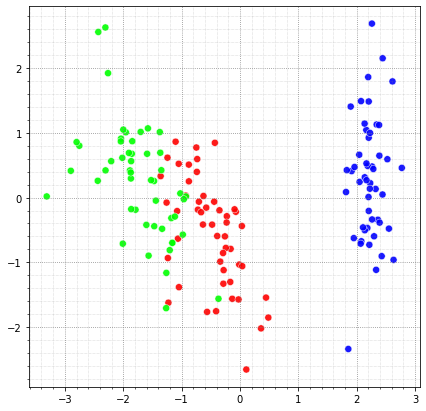

In [301]:
plot(X,y=y)

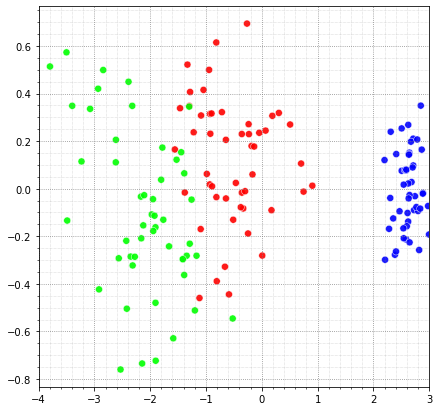

In [43]:
# Plot 2D scatter of the iris dataset using PCA for x1 and x3
def plot(X,y=None):
    X_PCA = PCA(X , 4)
    assert(X_PCA.shape[1]==4)
    x1,x2,x3,x4 = X_PCA.T
    plt.figure(figsize=(7,7))
    #plt.axvline(x=0, c='r', lw=.5)
    #plt.axhline(y=0, c='r', lw=.5)
    #plt.scatter(x1,x2, c=y, alpha=.9, linewidths=0.5, edgecolors='w', cmap='viridis')
    plt.scatter(x1,x3, c=y, alpha=.9, s=50, linewidths=0.5, edgecolors='w', cmap='brg')
    plt.grid(which='major', color='grey', linestyle=':')
    plt.minorticks_on()
    plt.grid(which='minor', color='grey', alpha=.6,  linestyle=':', lw=.5)
    plt.xlim(-4,3)
    #plt.ylim(-1.5,2.0)
    plt.show()
    
plot(X, y=y)

### 

### <font color='#003300'>d)</font>

In [6]:
# Perform a low rank reconsruction of a data matrix
def low_rank_reconstruction(X, r):
    Dn = X
    #Dn = np.mat(X - np.mean(X,axis=0))
    
    # Compute truncated SVD
    U, S, Vt = np.linalg.svd(Dn)
    Z = U[:, :r] @ np.diag(S[:r]) @ Vt[:r, :]
    
    V = Vt.T
    #Z = Dn * V

    U, S, Vt = np.linalg.svd(X)
    Z = U[:, :r] @ np.diag(S[:r]) @ Vt[:r, :]
    
    #print('approx matrix: \n', Z[:10])
    #print ('Rank of Output Matrix: ', r)
    return Z

### 

### <font color='#003300'>e)</font>

In [7]:
def reconstruction_error(X,r):
    orig_n = X
    #orig_n = np.mat(X - np.mean(X,axis=0))
    
    approx = low_rank_reconstruction(X, r)
    
    #diff = np.subtract(X,approx)
    diff = np.sum(X,axis=1) - np.sum(approx,axis=1)
    
    #print('Diff:\n',diff)
    err = np.array(diff.flat)
    return err

### 

In [8]:
err = reconstruction_error(X, r=3)

### 

### <font color='#003300'>f)</font>

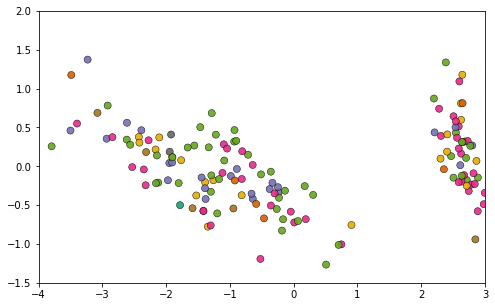

In [9]:
# Plot 2D scatter of the iris dataset using PCA for x1 and x2
def plot(X,y=None):
    X_PCA = PCA(X , 2)
    assert(X_PCA.shape[1]==2)
    x1,x2 = X_PCA.T
    plt.figure(figsize=(8,5))
    plt.scatter(x1,x2, c=y, alpha=.9, s=50, linewidths=0.5, edgecolors='black', cmap='Dark2')
    plt.xlim(-4,3)
    plt.ylim(-1.5,2.0)
    plt.show()
plot(X,y=err)

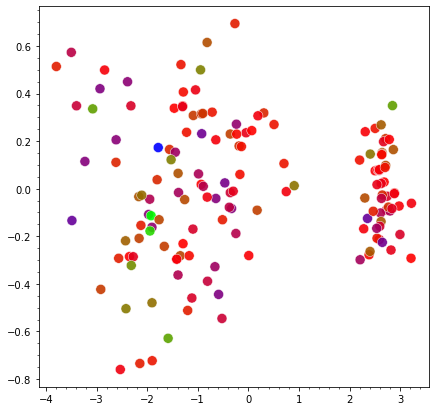

In [10]:
# Plot 2D scatter of the iris dataset using PCA for x1 and x3
def plot(X,y=None):
    X_PCA = PCA(X, 4)
    x1,x2,x3,x4 = X_PCA.T
    plt.figure(figsize=(7,7))
    plt.scatter(x1,x3, c=y, alpha=.9, s=100, linewidths=0.5, edgecolors='w', cmap='brg')
    plt.minorticks_on()
    plt.show()
plot(X,y=err)

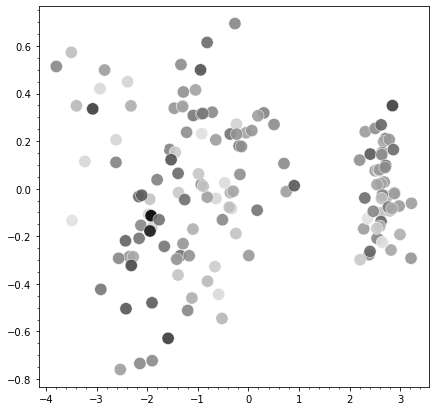

In [11]:
# Plot 2D scatter of the iris dataset using PCA for x1 and x3 in Greys
def plot(X,y=None):
    X_PCA = PCA(X, 4)
    x1,x2,x3,x4 = X_PCA.T
    plt.figure(figsize=(7,7))
    plt.scatter(x1,x3, c=y, alpha=.9, s=150, linewidths=0.5, edgecolors='w', cmap='Greys')
    plt.minorticks_on()
    plt.show()
plot(X,y=err)

### 

### <font color='#121254'>Question-3</font>

#### <font color='#003300'>Demonstrate an understanding of LDA</font>

### <font color='#003300'>a)</font>

In [4]:
def make_means(k, radius):
    mu = (np.random.rand(k)*2-1)*radius
    return mu

### 

### <font color='#003300'>b)</font>

In [51]:
def make_covariance(ratio, rotation):
    theta = np.radians(rotation)
    c, s = np.cos(theta), np.sin(theta)
    R = np.array([[c, -s], [s, c]])
    S = np.diag([ratio, 1])
    L = S**2
    return R@L@R.T

In [45]:
def make_covariance(ratio, rotation):
    M = np.mat(np.random.rand(ratio,ratio)*2-1)
    M = M+M.T
    return M

In [46]:
j = make_covariance(2, 45)
j

matrix([[ 1.68164253,  0.29958035],
        [ 0.29958035, -0.40164438]])

### 

### <font color='#003300'>c)</font>

In [7]:
def make_mean_and_cov(n, scale=2):
    #mu = (np.random.rand(n)*2-1)*scale
    mu = make_means(n,scale)
    return mu, make_covariance(n, scale)

def make_data(k=5, n_instances=500, radius=10, ratio=2):
    Ds = [np.random.multivariate_normal(*make_mean_and_cov(radius, ratio), n_instances) for i in range(k)]
    X = np.vstack(Ds)
    y = np.hstack([[i]*D.shape[0] for i, D in enumerate(Ds)])
    return np.mat(X),y.reshape(-1)

### 

### <font color='#003300'>d)</font>

In [8]:
def plot(M,y=None):
    #assert(M.shape[1]==2)
    x1,x2 = M.A.T
    plt.figure(figsize=(7,7))
    #plt.axvline(x=0, c='r', lw=.5)
    #plt.axhline(y=0, c='r', lw=.5)
    if y is None:
        plt.scatter(x1,x2, alpha=.6, s=200, linewidths=0.5, edgecolors='w', cmap='viridis')
    else:
        plt.scatter(x1,x2, c=y, alpha=.6, s=50,  linewidths=0.5, edgecolors='w', cmap='viridis')
    plt.grid(which='major', color='black', linestyle=':')
    #plt.minorticks_on()
    plt.grid(which='minor', color='black', alpha=.3,  linestyle=':', lw=.5)
    plt.axis('equal')
    #plt.xlim(-15, 15)
    #plt.ylim(-15, 10)
    plt.show()

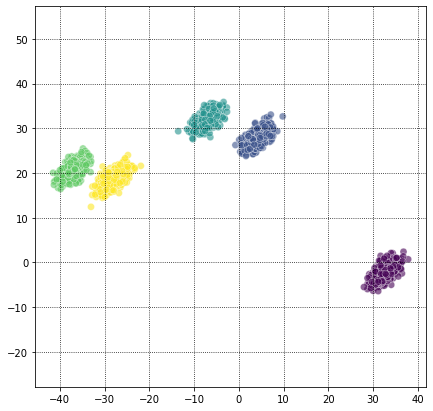

In [9]:
data_matrix,targets = make_data(k=5, n_instances=500, radius=2, ratio=45)
plot(data_matrix,targets)

### 

### <font color='#003300'>e)</font>

#### <font color='#003300'>LDA Model</font>

In [10]:
def covariance_matrix(D):
    n = D.shape[0]-1
    C = np.mat(D-np.mean(D,axis=0))
    S = C.T*C/n
    return S

def mean(D):
    return np.mat(np.mean(D,axis=0)).reshape(-1,1)

def LDA_factors(D,N):
    pi = D.shape[0]/N
    mu = mean(D)
    S = covariance_matrix(D)
    return pi,mu,S

def fit_LDA(X, y):
    #assert y[y==0].shape[0] + y[y==1].shape[0] == y.shape[0], 'Expecting 2 classes only'
    
    D0 = X[y==0]
    D1 = X[y==1]
    
    pi0,mu0,S0 = LDA_factors(D0,X.shape[0])
    pi1,mu1,S1 = LDA_factors(D1,X.shape[0])
    
    S = np.mat((S0+S1)/2)
    SI = S.I
    w = SI*(mu0-mu1)
    #c = np.log(pi0/pi1) -0.5 *mu0.T * SI * mu0 +0.5 *mu1.T * SI * mu1

    return w

In [20]:
def covariance_matrix(D):
    n = D.shape[0]-1
    C = np.mat(D-np.mean(D,axis=0))
    S = C.T*C/n
    return S

def mean(D):
    return np.mat(np.mean(D,axis=0)).reshape(-1,1)

def LDA_factors(D,N):
    pi = D.shape[0]/N
    mu = mean(D)
    S = covariance_matrix(D)
    return pi,mu,S

def fit_LDA(X, y):
    #assert y[y==0].shape[0] + y[y==1].shape[0] == y.shape[0], 'Expecting 2 classes only'
    
    D0 = X[y==0]
    D1 = X[y==1]
    D2 = X[y==2]
    D3 = X[y==3]
    D4 = X[y==4]
    
    pi0,mu0,S0 = LDA_factors(D0,X.shape[0])
    pi1,mu1,S1 = LDA_factors(D1,X.shape[0])
    pi2,mu2,S2 = LDA_factors(D2,X.shape[0])
    pi3,mu3,S3 = LDA_factors(D3,X.shape[0])
    pi4,mu4,S4 = LDA_factors(D4,X.shape[0])
    
    S = np.mat((S0+S1+S2+S3+S4)/5)
    SI = S.I
    w = SI#*(mu0-mu1)
    #c = np.log(pi0/pi1) -0.5 *mu0.T * SI * mu0 +0.5 *mu1.T * SI * mu1

    return w

### 

### <font color='#003300'>f)</font>

In [14]:
def test_LDA(D, w):
    return 1 - (D * w).astype(int).A.reshape(-1)

### 

### <font color='#003300'>g)</font>

In [15]:
def make_grid(D, n=10):
    mn = np.min(D.A,axis=0).reshape(-1)
    mx = np.max(D.A,axis=0).reshape(-1)
    dat1 = np.linspace(mn[0],mx[0],n)
    dat2 = np.linspace(mn[1],mx[1],n)
    #dat3 = np.linspace(mn[2],mx[2],n)
    #grid = [(x1,x2, x3) for x1 in dat1 for x2 in dat2 for x3 in dat3]
    grid = [(x1,x2) for x1 in dat1 for x2 in dat2]
    grid = np.mat(grid)
    return grid

### 

### <font color='#003300'>h)</font>

In [50]:
X,y = make_data(k=5, n_instances=500, radius=10, ratio=2)
w = fit_LDA(X,y)
#G = make_grid(X, n=500)
#p = test_LDA(G, w)
#X2 = np.vstack([X,G])
#y2 = np.hstack([y,p])
#plot(X2,y2)

/var/folders/s_/sm8t_p5x08d9x9_8fj7jrjp40000gq/T/ipykernel_76502/2192620474.py:7: RuntimeWarning: covariance is not positive-semidefinite.
  Ds = [np.random.multivariate_normal(*make_mean_and_cov(radius, ratio), n_instances) for i in range(k)]


TypeError: 'numpy.ndarray' object is not callable

In [48]:
X

matrix([[-5.28271619,  0.99957096,  2.64464982, ..., -0.02517285,
          0.08254537, -2.39446799],
        [ 0.16646102,  0.45442556, -2.05102039, ..., -1.79441867,
         -0.98909148, -3.24919473],
        [-2.16381964,  0.07577135,  0.80608859, ..., -0.39525095,
          0.39723486,  0.14204421],
        ...,
        [ 0.55690587, -0.25295662,  2.00041902, ...,  2.38326727,
         -2.9951273 ,  2.14014712],
        [ 2.39408153, -2.68295114,  0.1656437 , ..., -0.26397806,
         -4.93900417,  3.06967425],
        [ 0.27528069, -0.03574012,  1.65845185, ..., -0.91245262,
         -2.62717385,  1.22132645]])

In [49]:
y

array([0, 0, 0, ..., 4, 4, 4])

In [41]:
data = np.random.random((3,1))

In [42]:
data

array([[0.46084478],
       [0.72772642],
       [0.85167908]])

In [37]:
mean = np.mean(data, axis = 0)

In [38]:
mean

array([0.7304557])

In [43]:
cov = np.cov(data, rowvar=False)

In [44]:
cov

array(0.03989025)

In [141]:
def make_PSD(n):
    M = np.mat(np.random.rand(n,n)*2-1)
    M = M+M.T
    return M*M
    
def make_mean_and_cov(n, scale=10):
    mu = (np.random.rand(n)*2-1)*scale
    return mu, make_PSD(n)

def make_dataset(n_blobs=2, n_instances=1000, n_dim=2, scale=5):
    Ds = [np.random.multivariate_normal(*make_mean_and_cov(n_dim, scale), n_instances) for i in range(n_blobs)]
    X = np.vstack(Ds)
    y = np.hstack([[i]*D.shape[0] for i, D in enumerate(Ds)])
    return X,y
    
def plot(M,y=None):
    #assert(M.shape[1]==2)
    x1,x2 = M.T
    plt.figure(figsize=(7,7))
    #plt.axvline(x=0, c='r', lw=.5)
    #plt.axhline(y=0, c='r', lw=.5)
    if y is None:
        plt.scatter(x1,x2, alpha=.6, linewidths=0.5, edgecolors='w')
    else:
        plt.scatter(x1,x2, c=y, alpha=.6, linewidths=0.5, edgecolors='w', cmap='brg')
    plt.grid(which='major', color='grey', linestyle=':')
    plt.minorticks_on()
    plt.grid(which='minor', color='grey', alpha=.3,  linestyle=':', lw=.5)
    plt.axis('equal')
    plt.show()

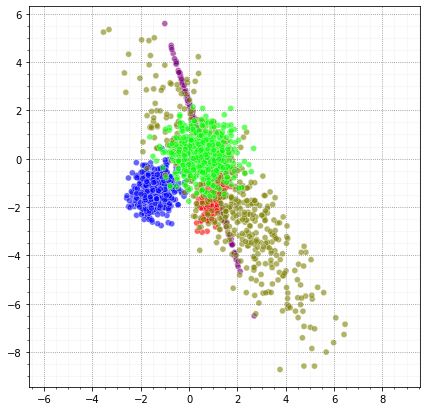

In [142]:
X,y = make_dataset(n_blobs=5, n_instances=500, n_dim=2, scale=2)
plot(X,y)

In [143]:
def covariance_matrix(D):
    n = D.shape[0]-1
    C = np.mat(D-np.mean(D,axis=0))
    S = C.T*C/n
    return S

def mean(D):
    return np.mat(np.mean(D,axis=0)).reshape(-1,1)
    
def LDA_factors(D,N):
    pi = D.shape[0]/N
    mu = mean(D)
    S = covariance_matrix(D)
    return pi,mu,S

def fit_LDA(X, y):
    #assert list(set(y))==[0,1], 'Expecting 2 classes only'
    
    D0 = X[y==0]
    D1 = X[y==1]
    
    pi0,mu0,S0 = LDA_factors(D0,X.shape[0])
    pi1,mu1,S1 = LDA_factors(D1,X.shape[0])
    
    S = np.mat((S0+S1)/2)
    SI = S.I
    w = SI*(mu0-mu1)
    c = np.log(pi0/pi1) -0.5 *mu0.T * SI * mu0 +0.5 *mu1.T * SI * mu1

    return w,c

def test_LDA(D, w, c):
    return 1 - (D * w > -c).astype(int).A.reshape(-1)

def make_grid(D, n=10):
    mn = np.min(D,axis=0).reshape(-1)
    mx = np.max(D,axis=0).reshape(-1)
    dat1 = np.linspace(mn[0],mx[0],n)
    dat2 = np.linspace(mn[1],mx[1],n)
    grid = [(x1,x2) for x1 in dat1  for x2 in dat2]
    grid = np.mat(grid)
    return grid

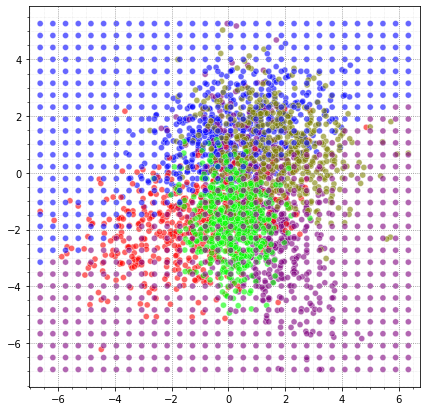

In [151]:
X,y = make_dataset(n_blobs=5, n_instances=500, n_dim=2, scale=2)

#X = X.reshape((2500,10))
#y = y.reshape((2500,1))
w,c = fit_LDA(X,y)
#w,c = fit_LDA(),)

G = make_grid(X, n=30)
p = test_LDA(G, w, c)

X2 = np.vstack([X,G])
y2 = np.hstack([y,p])
plot(X2.A,y2)

In [133]:
X

array([[  2.01159068,  -1.67126499,  -2.19885756, ...,  -2.60981668,
          2.90790318,   0.25401775],
       [  0.77587967,   1.93804608,  -6.2975805 , ...,  -2.14969022,
          0.58178945,  -0.12764404],
       [  3.08038572,  -8.0535885 ,   0.42197286, ..., -10.13195344,
          9.03966046,  -2.3486595 ],
       ...,
       [  0.99576406,  -2.28063643,  -4.07891368, ...,  -1.49022642,
         -1.84538609,   1.09271583],
       [ -0.43275469,   0.14173397,   0.76824981, ...,  -0.1394835 ,
         -1.09537186,   3.86617455],
       [ -1.31701626,  -1.29510967,   1.27969693, ...,   3.6101589 ,
         -2.86461799,   3.00292017]])

In [126]:
y.shape

(2500,)

In [127]:
X.reshape((2500,10))

array([[-2.89880791, -0.01265734, -1.35068889, ...,  0.00837005,
         1.85346184,  1.05377294],
       [-3.00436891,  1.07012511, -3.28850253, ...,  3.08733816,
         2.56906312,  0.67369494],
       [-0.85976064,  3.28095079,  1.17291543, ...,  2.15140468,
        -2.5741688 , -3.74459764],
       ...,
       [ 3.8373381 ,  1.55026048, -0.87510732, ..., -0.12411491,
        -4.98776012, -2.77646693],
       [-4.01073142, -0.8851355 , -0.87942723, ...,  3.66474333,
         3.15450739,  3.54936159],
       [-4.23056828, -5.98803543,  0.49096749, ...,  0.42355663,
         0.85550575,  3.84512697]])

In [128]:
y.reshape((2500,1))

array([[0],
       [0],
       [0],
       ...,
       [4],
       [4],
       [4]])